$$G=\sum^{K}_{k=1}p(k)(1-p(k))$$

### Q1) https://scikit-learn.org/stable/modules/tree.html#tree 샘플 확인 하자.  

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

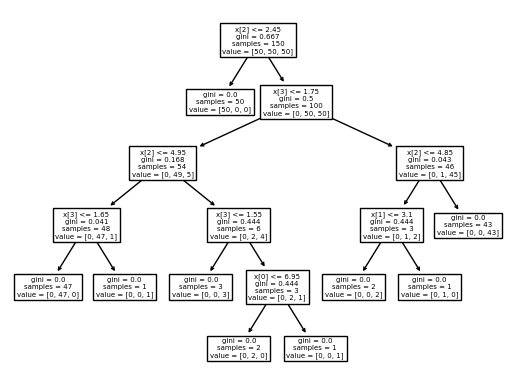

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)

1.Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
    X[2] <= 2.45 :세번째 특성값이 2.45이하인가?
    gini = 0.667 : 불순도가 높다
    samples = 150 : 샘플 수
    value = [50, 50, 50] : 각 클래스의 샘플 수

2.Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'), 1번의 왼쪽 자식 노드,첫번째 클래스에만 샘플이 존재한다 
    gini = 0.0 : 완전 순수 -> 오직 하나의 클래스만 존재한다
    sample = 50
    
    
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 [특정 노드의 결정 규칙 ,지니 지수 , 해당 노드에 도달할 샘플수 , 각 클래스의 속하는 샘플 수]

In [2]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

'iris.pdf'

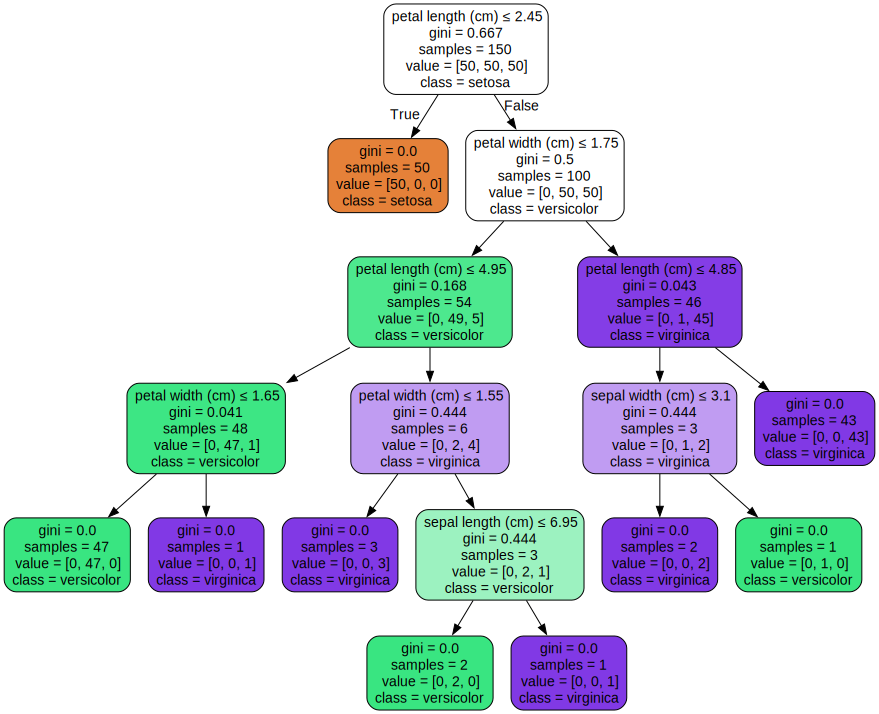

In [3]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

#### Q2) sklearn.ensemble.VotingClassifier를 사용하자.

In [4]:
#1.데이터를 로드하자 . 단, 2개의 클래스만 추출  -> 클래스라벨을 수치화 -> 분리 -> 표준화   
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

iris  = load_iris() 
X,y  = iris.data[50:,[1,2]] , iris.target[50:]

le= LabelEncoder() 

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 0.5, random_state =123)

sc  =  StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [5]:
import pandas as pd
iris  = load_iris() 
X,y  = iris.data[50:,[1,2]] , iris.target[50:]

In [6]:
import numpy as np
#target 변수를 문자열로 선언 후 변환해 보자.

y_str = np.array(['class1' if label == 1 else 'class2' for label in y])
le= LabelEncoder() 
res = le.fit_transform(y_str)
y_str,le.classes_

(array(['class1', 'class1', 'class1', 'class1', 'class1', 'class1',
        'class1', 'class1', 'class1', 'class1', 'class1', 'class1',
        'class1', 'class1', 'class1', 'class1', 'class1', 'class1',
        'class1', 'class1', 'class1', 'class1', 'class1', 'class1',
        'class1', 'class1', 'class1', 'class1', 'class1', 'class1',
        'class1', 'class1', 'class1', 'class1', 'class1', 'class1',
        'class1', 'class1', 'class1', 'class1', 'class1', 'class1',
        'class1', 'class1', 'class1', 'class1', 'class1', 'class1',
        'class1', 'class1', 'class2', 'class2', 'class2', 'class2',
        'class2', 'class2', 'class2', 'class2', 'class2', 'class2',
        'class2', 'class2', 'class2', 'class2', 'class2', 'class2',
        'class2', 'class2', 'class2', 'class2', 'class2', 'class2',
        'class2', 'class2', 'class2', 'class2', 'class2', 'class2',
        'class2', 'class2', 'class2', 'class2', 'class2', 'class2',
        'class2', 'class2', 'class2', 'class2', 

In [7]:
#2.앙상블 할 모델을 생성하자.  
from sklearn.linear_model import LogisticRegression #lr
from sklearn.ensemble import RandomForestClassifier #rf 
from sklearn.neighbors import KNeighborsClassifier  #knn

est1 = LogisticRegression(penalty ='l2' , C=0.01, random_state = 1 )
est2 = RandomForestClassifier(n_estimators=10 , random_state = 1)
est3 = KNeighborsClassifier(n_neighbors =1) 


In [8]:
#3. 각 앙상블에 사용할 수 있는 분류기들을 실행하면서 모델을 확인하자.  
#  예측 정밀도에 영향을 주는 변수  : estimators , voting, weights 3가지 이다.  -> 테스트 데이터의 정답률
#  score(X,y)  y를 정답 레이블로 , X로 부터 예측되는 값의  정답률
from sklearn.ensemble import VotingClassifier

vc1 =VotingClassifier(estimators=[('lr',est1), ('rf', est2),('knn' , est3) ] , voting='hard')  

vc2 =VotingClassifier(estimators=[('lr',est1), ('rf', est2),('knn' , est3) ] , voting='soft', \
                      flatten_transform=True )  

vc3 =VotingClassifier(estimators=[('lr',est1), ('rf', est2),('knn' , est3) ] , voting='soft', \
                                            flatten_transform=True,  weights=[10,1,1])

In [9]:
#4. 실행, 출력하자. 
name_list = ['Logistic' ,'RandomForest', 'KNeighbors' , 'voting=hard' , 'voting=soft' ,'voting,weights'  ]
est_list =[est1,est2, est3, vc1,vc2,vc3]

for est, name in zip( est_list , name_list) :
    est.fit(X_train_std, y_train)
    print('ACC. : %.2f [%s]' % (est.score(X_test_std, y_test), name))
    

ACC. : 0.68 [Logistic]
ACC. : 0.92 [RandomForest]
ACC. : 0.86 [KNeighbors]
ACC. : 0.86 [voting=hard]
ACC. : 0.86 [voting=soft]
ACC. : 0.86 [voting,weights]


In [10]:
print('vc1 predict :' , vc1.predict(X_train_std)[8]) #index =8 의 데이터에 대한 앙상블모델의 예측결과를 출력 해보자 
print('vc2 predict :' , vc2.predict(X_train_std)[8]) #index =8 의 데이터에 대한 앙상블모델의 예측결과를 출력 해보자 
print('vc3 predict :' , vc3.predict(X_train_std)[8]) #index =8 의 데이터에 대한 앙상블모델의 예측결과를 출력 해보자 

vc1 predict : 2
vc2 predict : 2
vc3 predict : 2


In [11]:
#6.각 모델의 예측 결과 확인  transform
#[est1예측결과, est2의 예측결과, est3의 결과 ]
print('vc1 transform :' , vc1.transform(X_train_std)[8])

vc1 transform : [1 1 1]


In [12]:
# transform의 결과는 
#[est1에서 0의 확률 ,est1에서 1의 확률,est2에서 0의확률, est2에서1의 확률 , est3에서 0의확률, est3에서1의 확률    ]
print('vc2 transform :' , vc2.transform(X_train_std)[8])
print('vc2 predict_proba :' , vc2.predict_proba(X_train_std)[8])

vc2 transform : [0.45593881 0.54406119 0.         1.         0.         1.        ]
vc2 predict_proba : [0.1519796 0.8480204]


In [13]:
print('vc3 transform :' , vc3.transform(X_train_std)[8])
print('vc3 predict_proba :' , vc3.predict_proba(X_train_std)[8])

vc3 transform : [0.45593881 0.54406119 0.         1.         0.         1.        ]
vc3 predict_proba : [0.37994901 0.62005099]


In [14]:
# 7. transform의 메소드의 결과를  flatten_transform=False로 지정해서 출력의 형태를 바꾸어 보자 .
 #verbose =True  : 각 모형의 학습시간을 체크해보자. 
vc2_res =VotingClassifier(estimators=[('lr',est1), ('rf', est2),('knn' , est3) ] , voting='soft', \
                      flatten_transform=False, verbose=True )  

vc2_res.fit(X_train_std, y_train)

[Voting] ....................... (1 of 3) Processing lr, total=   0.0s
[Voting] ....................... (2 of 3) Processing rf, total=   0.0s
[Voting] ...................... (3 of 3) Processing knn, total=   0.0s


VotingClassifier(estimators=[('lr', LogisticRegression(C=0.01, random_state=1)),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=1)),
                             ('knn', KNeighborsClassifier(n_neighbors=1))],
                 flatten_transform=False, verbose=True, voting='soft')

In [15]:
print('vc2_res transform :' , vc2_res.transform(X_train_std)[0,8])
print('vc2_res transform :' , vc2_res.transform(X_train_std)[1,8])
print('vc2_res transform :' , vc2_res.transform(X_train_std)[2,8])

vc2_res transform : [0.45593881 0.54406119]
vc2_res transform : [0. 1.]
vc2_res transform : [0. 1.]


In [25]:
#8.vc1.get_params()로 하이퍼파라미터 리턴을 받아 보자. 
vc1.get_params()
before = vc1.get_params()
vc1.set_params(lr__C= 0.0001)
after = vc1.get_params()

pd_before = pd.DataFrame([before])
pd_after = pd.DataFrame([after])
pd_before

,estimators,flatten_transform,n_jobs,verbose,voting,weights,lr,rf,knn,lr__C,...,rf__verbose,rf__warm_start,knn__algorithm,knn__leaf_size,knn__metric,knn__metric_params,knn__n_jobs,knn__n_neighbors,knn__p,knn__weights
0,"[(lr, LogisticRegression(C=0.0001, random_stat...",True,None,False,hard,None,"LogisticRegression(C=0.0001, random_state=1)","(DecisionTreeClassifier(max_features='sqrt', r...",KNeighborsClassifier(n_neighbors=1),0.0001,...,0,False,auto,30,minkowski,None,None,1,2,uniform


In [26]:
pd_after

,estimators,flatten_transform,n_jobs,verbose,voting,weights,lr,rf,knn,lr__C,...,rf__verbose,rf__warm_start,knn__algorithm,knn__leaf_size,knn__metric,knn__metric_params,knn__n_jobs,knn__n_neighbors,knn__p,knn__weights
0,"[(lr, LogisticRegression(C=0.0001, random_stat...",True,None,False,hard,None,"LogisticRegression(C=0.0001, random_state=1)","(DecisionTreeClassifier(max_features='sqrt', r...",KNeighborsClassifier(n_neighbors=1),0.0001,...,0,False,auto,30,minkowski,None,None,1,2,uniform


### Q3) Max voting = VotingClassifier 을 사용해보자 . 
- 서로 다른 모델을 결합해서 사용하는 기법으로 각각의 모델의 약한점을 보안해서 사용하는 목적을 가진것

In [27]:
# 라이브러리 가져오기
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

seed = 0

# 데이터로드
loaded_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(loaded_data.data, loaded_data.target, random_state=seed)
kfold = model_selection.KFold(n_splits = 5)
scores = {}

# 로지스틱 회귀
lr_clf = LogisticRegression(solver='lbfgs', max_iter=10000)
lr_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(lr_clf, X_test, y_test, cv = kfold)
scores[('1.Logistic_regression', 'train_score')] = results.mean()
scores[('1.Logistic_regression', 'test_score')] = lr_clf.score(X_test, y_test)

# 결정 나무
dtc_clf = DecisionTreeClassifier(random_state=seed)
dtc_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(dtc_clf, X_test, y_test, cv = kfold)
scores[('2.decision_tree', 'train_score')] = results.mean()
scores[('2.decision_tree', 'test_score')] = dtc_clf.score(X_test, y_test)

# 지원 벡터 머신(SVM)
svm_clf = SVC(probability=True, random_state=seed)
svm_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(svm_clf, X_test, y_test, cv = kfold)
scores[('3.SVM', 'train_score')] = results.mean()
scores[('3.SVM', 'test_score')] = svm_clf.score(X_test, y_test)

# 버깅 앙상블  : Max Voting 
estimators=[('lr', lr_clf), ('dtc', dtc_clf), ('svc', svm_clf)]
vote_clf=VotingClassifier(estimators=estimators, voting='hard')
vote_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(vote_clf, X_test, y_test, cv = kfold)
scores[('4.Max_voting', 'train_score')] = results.mean()
scores[('4.Max_voting', 'test_score')] = vote_clf.score(X_test, y_test)

# 모델 평가
pd.Series(scores).unstack()

,test_score,train_score
1.Logistic_regression,0.951049,0.936946
2.decision_tree,0.881119,0.916010
3.SVM,0.937063,0.916749
4.Max_voting,0.958042,0.951232


### Q4)    Weighted Average Voting  모델의 앙상블을 학습하자

In [18]:
# 라이브러리 가져오기
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

seed = 0

# 데이터로드
loaded_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(loaded_data.data, loaded_data.target, random_state=seed)
kfold = model_selection.KFold(n_splits = 5)
scores = {}

# 1. 로지스틱 회귀
lr_clf = LogisticRegression(solver='lbfgs', max_iter=10000)
lr_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(lr_clf, X_test, y_test, cv = kfold)
scores[('1.Logistic_regression', 'train_score')] = results.mean()
scores[('1.Logistic_regression', 'test_score')] = lr_clf.score(X_test, y_test)

# 2. 결정 나무
dtc_clf = DecisionTreeClassifier(random_state=seed)
dtc_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(dtc_clf, X_test, y_test, cv = kfold)
scores[('2.decision_tree', 'train_score')] = results.mean()
scores[('2.decision_tree', 'test_score')] = dtc_clf.score(X_test, y_test)

# 지원 벡터 머신(SVM)
svm_clf = SVC(probability=True, random_state=seed)
svm_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(svm_clf, X_test, y_test, cv = kfold)
scores[('3.SVM', 'train_score')] = results.mean()
scores[('3.SVM', 'test_score')] = svm_clf.score(X_test, y_test)

# 버깅 앙상블  : Max Voting 
estimators=[('lr', lr_clf), ('dtc', dtc_clf), ('svc', svm_clf)]
vote_clf=VotingClassifier(estimators=estimators, voting='hard')
vote_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(vote_clf, X_test, y_test, cv = kfold)
scores[('4.Max_voting', 'train_score')] = results.mean()
scores[('4.Max_voting', 'test_score')] = vote_clf.score(X_test, y_test)


# 버깅 앙상블  : Weighted Average Voting  (중량을 깃점으로  )
#평가   : 학습데이터 5분할 교차검증, 테스트 정확도  (Accuracy)
dtc = DecisionTreeClassifier(random_state = seed)
estimators=[('lr', lr_clf), ('dtc', dtc_clf), ('svc', svm_clf)]
vote_clf=VotingClassifier(estimators=estimators, voting='soft', weights =[3,1,1])
vote_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(vote_clf, X_test, y_test, cv = kfold)
scores[('5.Weighted Average_voting', 'train_score')] = results.mean()
scores[('5.Weighted Average_voting', 'test_score')] = vote_clf.score(X_test, y_test)

# 모델 평가
pd.Series(scores).unstack()

,test_score,train_score
1.Logistic_regression,0.951049,0.936946
2.decision_tree,0.881119,0.916010
3.SVM,0.937063,0.916749
4.Max_voting,0.958042,0.951232
5.Weighted Average_voting,0.958042,0.965025


### Q5)  배깅 앙상블을 해보자  
     -  1)데이터 셋  : 암판정 데이터 
     -  2) 모델  : 결정트리와 배깅 앙상블의 결정 트리 
     -  3) 평가  : 학습데이터 5분할 교차검증, 테스트 정확도  (Accuracy)

In [28]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

seed = 0

# 데이터로드
loaded_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(loaded_data.data, loaded_data.target, random_state=seed)
kfold = model_selection.KFold(n_splits = 5)
scores = {}


# 결정 나무
dtc_clf = DecisionTreeClassifier(random_state=seed)
dtc_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(dtc_clf, X_test, y_test, cv = kfold)
scores[('1.decision_tree', 'train_score')] = results.mean()
scores[('1.decision_tree', 'test_score')] = dtc_clf.score(X_test, y_test)

#배깅 앙상블 결정나무   :복원추출  -> 평균 ,증앙값 , 표준편차등 추정치 확인
# 모델의 예측 결과 변형이 심하다 변형을 낮출때 사용 -> 예측값과 실제값의 오차가 클 때 개선하는 방법  
# n_estiamtors=100 -> 100개의 기본 모델이 생성 
# 작동방식 : 데이터 셋이 생성된 기본모델,서로다른 부분 집합에 대해 학습된다. 분산을 감소 ,
#예측은 분류 = 투표/회귀 = 평균

#### 기본모델 100개 생성해서 각 모델이 부트스트랩 샘플에 의해서 학습된다
bag_model  = BaggingClassifier(dtc_clf, n_estimators=100, random_state=seed)    #객체생성
bag_model.fit(X_train,y_train)  #실행  

results = model_selection.cross_val_score(bag_model, X_test, y_test, cv = kfold)
scores[('2.decision_tree_bagging', 'train_score')] = results.mean()
scores[('2.decision_tree_bagging', 'test_score')] = bag_model.score(X_test, y_test)

#모델 평가
pd.Series(scores).unstack() 

,test_score,train_score
1.decision_tree,0.881119,0.916010
2.decision_tree_bagging,0.986014,0.958128


### Q6) 부스팅 (Boosting) 앙상블을 해보자

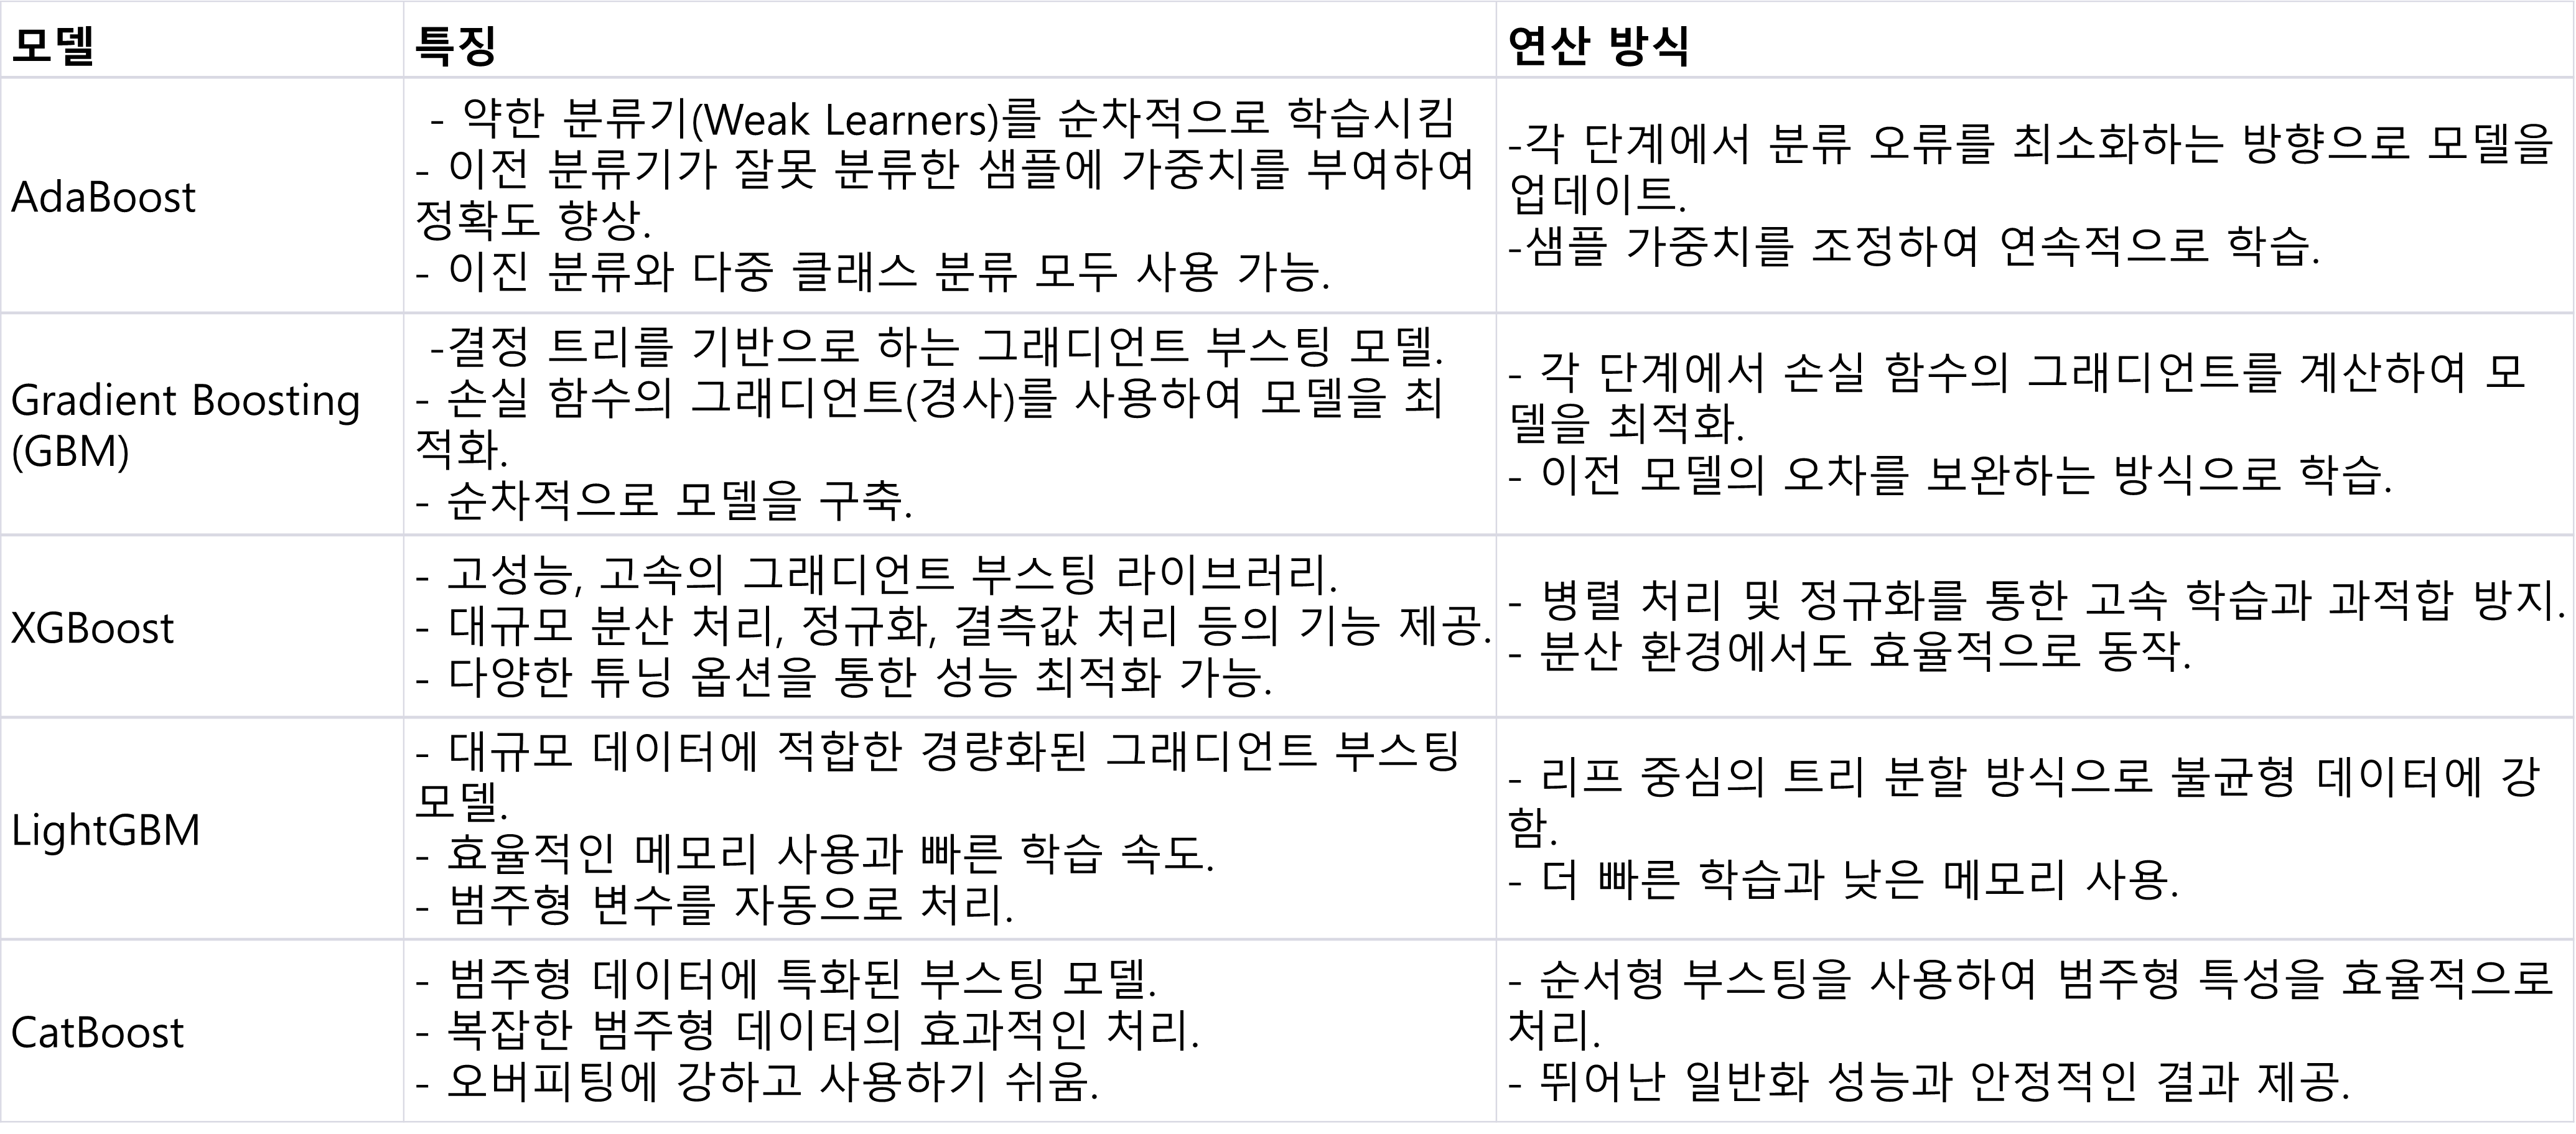

In [20]:
# 라이브러리 가져오기
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


seed = 0

#데이터로드
loaded_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(loaded_data.data, loaded_data.target, random_state=seed)
kfold = model_selection.KFold(n_splits = 5)
scores = {}

# 1. 로지스틱 회귀
lr_clf = LogisticRegression(solver='lbfgs', max_iter=10000)
lr_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(lr_clf, X_test, y_test, cv = kfold)
scores[('1.Logistic_regression', 'train_score')] = results.mean()
scores[('1.Logistic_regression', 'test_score')] = lr_clf.score(X_test, y_test)

# 2. 결정 나무
dtc_clf = DecisionTreeClassifier(random_state=seed)
dtc_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(dtc_clf, X_test, y_test, cv = kfold)
scores[('2.decision_tree', 'train_score')] = results.mean()
scores[('2.decision_tree', 'test_score')] = dtc_clf.score(X_test, y_test)

# 3. 랜덤 포레스트
rfc_clf = RandomForestClassifier(max_depth=5, random_state=seed)
rfc_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(rfc_clf, X_test, y_test, cv = kfold)
scores[('3.Random Forest', 'train_score')] = results.mean()
scores[('3.Random Forest', 'test_score')] = rfc_clf.score(X_test, y_test)

#4. AdaBoost
adb_clf = AdaBoostClassifier(n_estimators=100, random_state=seed)
adb_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(adb_clf, X_test, y_test, cv = kfold)
scores[('4.AdaBoost', 'train_score')] = results.mean()
scores[('4.AdaBoost', 'test_score')] = adb_clf.score(X_test, y_test)

# 5. GradientBoosting (GBM)
gbm_clf = GradientBoostingClassifier(random_state=seed)
gbm_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(gbm_clf, X_test, y_test, cv = kfold)
scores[('5.GBM', 'train_score')] = results.mean()
scores[('5.GBM', 'test_score')] = gbm_clf.score(X_test, y_test)

#6. xgboost
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(xgb_clf, X_test, y_test, cv = kfold)
scores[('6.xgboost', 'train_score')] = results.mean()
scores[('6.xgboost', 'test_score')] = xgb_clf.score(X_test, y_test)

#7. lightGBM
lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(lgbm_clf, X_test, y_test, cv = kfold)
scores[('7.lightGBM', 'train_score')] = results.mean()
scores[('7.lightGBM', 'test_score')] = lgbm_clf.score(X_test, y_test)

#8.CatBoost

ctb_clf = CatBoostClassifier()
ctb_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(ctb_clf, X_test, y_test, cv = kfold)
scores[('8.CatBoost', 'train_score')] = results.mean()
scores[('8.CatBoost', 'test_score')] = ctb_clf.score(X_test, y_test)

# 모델 평가
pd.Series(scores).unstack()


[LightGBM] [Info] Number of positive: 267, number of negative: 159
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4272
[LightGBM] [Info] Number of data points in the train set: 426, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.626761 -> initscore=0.518344
[LightGBM] [Info] Start training from score 0.518344
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

0:	learn: 0.6819610	total: 143ms	remaining: 2m 22s
1:	learn: 0.6713273	total: 149ms	remaining: 1m 14s
2:	learn: 0.6605134	total: 155ms	remaining: 51.5s
3:	learn: 0.6505942	total: 162ms	remaining: 40.4s
4:	learn: 0.6392054	total: 167ms	remaining: 33.3s
5:	learn: 0.6304955	total: 173ms	remaining: 28.6s
6:	learn: 0.6204983	total: 178ms	remaining: 25.2s
7:	learn: 0.6110683	total: 184ms	remaining: 22.8s
8:	learn: 0.6009267	total: 188ms	remaining: 20.7s
9:	learn: 0.5919378	total: 192ms	remaining: 19s
10:	learn: 0.5825900	total: 198ms	remaining: 17.8s
11:	learn: 0.5734607	total: 202ms	remaining: 16.6s
12:	learn: 0.5652660	total: 205ms	remaining: 15.6s
13:	learn: 0.5570923	total: 209ms	remaining: 14.7s
14:	learn: 0.5493518	total: 213ms	remaining: 14s
15:	learn: 0.5414479	total: 217ms	remaining: 13.4s
16:	learn: 0.5340043	total: 222ms	remaining: 12.8s
17:	learn: 0.5261203	total: 229ms	remaining: 12.5s
18:	learn: 0.5192406	total: 233ms	remaining: 12.1s
19:	learn: 0.5117960	total: 237ms	remaining

171:	learn: 0.1106488	total: 971ms	remaining: 4.67s
172:	learn: 0.1099881	total: 975ms	remaining: 4.66s
173:	learn: 0.1090884	total: 980ms	remaining: 4.65s
174:	learn: 0.1084784	total: 984ms	remaining: 4.64s
175:	learn: 0.1078334	total: 988ms	remaining: 4.62s
176:	learn: 0.1072845	total: 991ms	remaining: 4.61s
177:	learn: 0.1065504	total: 995ms	remaining: 4.6s
178:	learn: 0.1059176	total: 1000ms	remaining: 4.58s
179:	learn: 0.1052093	total: 1s	remaining: 4.58s
180:	learn: 0.1046636	total: 1.01s	remaining: 4.57s
181:	learn: 0.1041246	total: 1.01s	remaining: 4.56s
182:	learn: 0.1032190	total: 1.02s	remaining: 4.54s
183:	learn: 0.1028330	total: 1.02s	remaining: 4.53s
184:	learn: 0.1021226	total: 1.02s	remaining: 4.52s
185:	learn: 0.1016238	total: 1.03s	remaining: 4.52s
186:	learn: 0.1009774	total: 1.04s	remaining: 4.51s
187:	learn: 0.1004205	total: 1.04s	remaining: 4.5s
188:	learn: 0.0997465	total: 1.05s	remaining: 4.49s
189:	learn: 0.0991176	total: 1.05s	remaining: 4.48s
190:	learn: 0.09

350:	learn: 0.0481354	total: 1.78s	remaining: 3.29s
351:	learn: 0.0479782	total: 1.79s	remaining: 3.29s
352:	learn: 0.0477460	total: 1.79s	remaining: 3.28s
353:	learn: 0.0476199	total: 1.8s	remaining: 3.28s
354:	learn: 0.0474533	total: 1.8s	remaining: 3.27s
355:	learn: 0.0472437	total: 1.8s	remaining: 3.27s
356:	learn: 0.0471157	total: 1.81s	remaining: 3.26s
357:	learn: 0.0469424	total: 1.81s	remaining: 3.25s
358:	learn: 0.0467710	total: 1.82s	remaining: 3.25s
359:	learn: 0.0466099	total: 1.82s	remaining: 3.24s
360:	learn: 0.0464155	total: 1.83s	remaining: 3.23s
361:	learn: 0.0462108	total: 1.83s	remaining: 3.23s
362:	learn: 0.0460713	total: 1.83s	remaining: 3.22s
363:	learn: 0.0458666	total: 1.84s	remaining: 3.21s
364:	learn: 0.0456948	total: 1.84s	remaining: 3.21s
365:	learn: 0.0455299	total: 1.85s	remaining: 3.2s
366:	learn: 0.0453482	total: 1.85s	remaining: 3.2s
367:	learn: 0.0452447	total: 1.86s	remaining: 3.19s
368:	learn: 0.0451312	total: 1.86s	remaining: 3.18s
369:	learn: 0.044

531:	learn: 0.0281880	total: 2.6s	remaining: 2.29s
532:	learn: 0.0281171	total: 2.61s	remaining: 2.29s
533:	learn: 0.0280226	total: 2.61s	remaining: 2.28s
534:	learn: 0.0279856	total: 2.62s	remaining: 2.28s
535:	learn: 0.0278961	total: 2.62s	remaining: 2.27s
536:	learn: 0.0278482	total: 2.63s	remaining: 2.27s
537:	learn: 0.0277839	total: 2.63s	remaining: 2.26s
538:	learn: 0.0277343	total: 2.64s	remaining: 2.25s
539:	learn: 0.0276674	total: 2.64s	remaining: 2.25s
540:	learn: 0.0275866	total: 2.65s	remaining: 2.25s
541:	learn: 0.0275278	total: 2.65s	remaining: 2.24s
542:	learn: 0.0274587	total: 2.65s	remaining: 2.23s
543:	learn: 0.0274168	total: 2.66s	remaining: 2.23s
544:	learn: 0.0273243	total: 2.66s	remaining: 2.22s
545:	learn: 0.0272863	total: 2.67s	remaining: 2.22s
546:	learn: 0.0272293	total: 2.67s	remaining: 2.21s
547:	learn: 0.0271545	total: 2.67s	remaining: 2.21s
548:	learn: 0.0270977	total: 2.68s	remaining: 2.2s
549:	learn: 0.0270437	total: 2.68s	remaining: 2.19s
550:	learn: 0.

711:	learn: 0.0187073	total: 3.43s	remaining: 1.39s
712:	learn: 0.0186497	total: 3.43s	remaining: 1.38s
713:	learn: 0.0186270	total: 3.44s	remaining: 1.38s
714:	learn: 0.0185720	total: 3.44s	remaining: 1.37s
715:	learn: 0.0185437	total: 3.45s	remaining: 1.37s
716:	learn: 0.0185161	total: 3.45s	remaining: 1.36s
717:	learn: 0.0184809	total: 3.46s	remaining: 1.36s
718:	learn: 0.0184448	total: 3.46s	remaining: 1.35s
719:	learn: 0.0184187	total: 3.47s	remaining: 1.35s
720:	learn: 0.0183596	total: 3.47s	remaining: 1.34s
721:	learn: 0.0183117	total: 3.47s	remaining: 1.34s
722:	learn: 0.0182719	total: 3.48s	remaining: 1.33s
723:	learn: 0.0182418	total: 3.48s	remaining: 1.33s
724:	learn: 0.0182098	total: 3.49s	remaining: 1.32s
725:	learn: 0.0181812	total: 3.49s	remaining: 1.32s
726:	learn: 0.0181335	total: 3.5s	remaining: 1.31s
727:	learn: 0.0181060	total: 3.5s	remaining: 1.31s
728:	learn: 0.0180791	total: 3.51s	remaining: 1.3s
729:	learn: 0.0180413	total: 3.51s	remaining: 1.3s
730:	learn: 0.01

888:	learn: 0.0133100	total: 4.25s	remaining: 530ms
889:	learn: 0.0132697	total: 4.25s	remaining: 525ms
890:	learn: 0.0132367	total: 4.26s	remaining: 521ms
891:	learn: 0.0132111	total: 4.26s	remaining: 516ms
892:	learn: 0.0131910	total: 4.27s	remaining: 511ms
893:	learn: 0.0131646	total: 4.27s	remaining: 507ms
894:	learn: 0.0131304	total: 4.28s	remaining: 502ms
895:	learn: 0.0131108	total: 4.28s	remaining: 497ms
896:	learn: 0.0130620	total: 4.29s	remaining: 492ms
897:	learn: 0.0130351	total: 4.29s	remaining: 487ms
898:	learn: 0.0130135	total: 4.29s	remaining: 482ms
899:	learn: 0.0129852	total: 4.3s	remaining: 477ms
900:	learn: 0.0129659	total: 4.3s	remaining: 473ms
901:	learn: 0.0129520	total: 4.31s	remaining: 468ms
902:	learn: 0.0129313	total: 4.31s	remaining: 463ms
903:	learn: 0.0129030	total: 4.32s	remaining: 458ms
904:	learn: 0.0128781	total: 4.32s	remaining: 454ms
905:	learn: 0.0128575	total: 4.33s	remaining: 449ms
906:	learn: 0.0128261	total: 4.33s	remaining: 444ms
907:	learn: 0.

94:	learn: 0.3423219	total: 225ms	remaining: 2.14s
95:	learn: 0.3402404	total: 228ms	remaining: 2.14s
96:	learn: 0.3379830	total: 231ms	remaining: 2.15s
97:	learn: 0.3358883	total: 236ms	remaining: 2.17s
98:	learn: 0.3334260	total: 239ms	remaining: 2.17s
99:	learn: 0.3313871	total: 241ms	remaining: 2.17s
100:	learn: 0.3295548	total: 243ms	remaining: 2.16s
101:	learn: 0.3274700	total: 245ms	remaining: 2.16s
102:	learn: 0.3253760	total: 247ms	remaining: 2.15s
103:	learn: 0.3236293	total: 249ms	remaining: 2.15s
104:	learn: 0.3215102	total: 251ms	remaining: 2.14s
105:	learn: 0.3191614	total: 254ms	remaining: 2.14s
106:	learn: 0.3165911	total: 255ms	remaining: 2.13s
107:	learn: 0.3146822	total: 257ms	remaining: 2.13s
108:	learn: 0.3121037	total: 260ms	remaining: 2.12s
109:	learn: 0.3098773	total: 262ms	remaining: 2.12s
110:	learn: 0.3075534	total: 264ms	remaining: 2.11s
111:	learn: 0.3056196	total: 266ms	remaining: 2.11s
112:	learn: 0.3034039	total: 268ms	remaining: 2.1s
113:	learn: 0.30134

258:	learn: 0.1386254	total: 622ms	remaining: 1.78s
259:	learn: 0.1381222	total: 624ms	remaining: 1.77s
260:	learn: 0.1375539	total: 626ms	remaining: 1.77s
261:	learn: 0.1370551	total: 629ms	remaining: 1.77s
262:	learn: 0.1364192	total: 631ms	remaining: 1.77s
263:	learn: 0.1358105	total: 633ms	remaining: 1.76s
264:	learn: 0.1350855	total: 636ms	remaining: 1.76s
265:	learn: 0.1345144	total: 638ms	remaining: 1.76s
266:	learn: 0.1339412	total: 640ms	remaining: 1.76s
267:	learn: 0.1332816	total: 642ms	remaining: 1.75s
268:	learn: 0.1326411	total: 645ms	remaining: 1.75s
269:	learn: 0.1318969	total: 649ms	remaining: 1.75s
270:	learn: 0.1313094	total: 651ms	remaining: 1.75s
271:	learn: 0.1306496	total: 655ms	remaining: 1.75s
272:	learn: 0.1301559	total: 656ms	remaining: 1.75s
273:	learn: 0.1295464	total: 659ms	remaining: 1.75s
274:	learn: 0.1290562	total: 661ms	remaining: 1.74s
275:	learn: 0.1285207	total: 663ms	remaining: 1.74s
276:	learn: 0.1280219	total: 665ms	remaining: 1.74s
277:	learn: 

421:	learn: 0.0735192	total: 1s	remaining: 1.37s
422:	learn: 0.0733069	total: 1s	remaining: 1.37s
423:	learn: 0.0730631	total: 1.01s	remaining: 1.37s
424:	learn: 0.0727487	total: 1.01s	remaining: 1.36s
425:	learn: 0.0725202	total: 1.01s	remaining: 1.36s
426:	learn: 0.0722958	total: 1.01s	remaining: 1.36s
427:	learn: 0.0721027	total: 1.01s	remaining: 1.36s
428:	learn: 0.0718504	total: 1.02s	remaining: 1.35s
429:	learn: 0.0715724	total: 1.02s	remaining: 1.35s
430:	learn: 0.0713714	total: 1.02s	remaining: 1.35s
431:	learn: 0.0711945	total: 1.03s	remaining: 1.35s
432:	learn: 0.0710210	total: 1.03s	remaining: 1.35s
433:	learn: 0.0707744	total: 1.03s	remaining: 1.34s
434:	learn: 0.0705192	total: 1.03s	remaining: 1.34s
435:	learn: 0.0702754	total: 1.04s	remaining: 1.34s
436:	learn: 0.0700885	total: 1.04s	remaining: 1.34s
437:	learn: 0.0697796	total: 1.04s	remaining: 1.33s
438:	learn: 0.0696337	total: 1.04s	remaining: 1.33s
439:	learn: 0.0694618	total: 1.04s	remaining: 1.33s
440:	learn: 0.0692

587:	learn: 0.0452035	total: 1.41s	remaining: 989ms
588:	learn: 0.0450957	total: 1.41s	remaining: 986ms
589:	learn: 0.0450081	total: 1.42s	remaining: 984ms
590:	learn: 0.0448992	total: 1.42s	remaining: 982ms
591:	learn: 0.0448209	total: 1.42s	remaining: 979ms
592:	learn: 0.0447153	total: 1.42s	remaining: 977ms
593:	learn: 0.0446135	total: 1.43s	remaining: 974ms
594:	learn: 0.0445045	total: 1.43s	remaining: 972ms
595:	learn: 0.0443740	total: 1.43s	remaining: 969ms
596:	learn: 0.0442508	total: 1.43s	remaining: 967ms
597:	learn: 0.0441428	total: 1.44s	remaining: 965ms
598:	learn: 0.0440691	total: 1.44s	remaining: 964ms
599:	learn: 0.0439632	total: 1.44s	remaining: 961ms
600:	learn: 0.0438630	total: 1.44s	remaining: 959ms
601:	learn: 0.0437345	total: 1.45s	remaining: 956ms
602:	learn: 0.0436409	total: 1.45s	remaining: 953ms
603:	learn: 0.0435328	total: 1.45s	remaining: 951ms
604:	learn: 0.0434347	total: 1.45s	remaining: 949ms
605:	learn: 0.0433118	total: 1.46s	remaining: 946ms
606:	learn: 

820:	learn: 0.0278577	total: 1.98s	remaining: 432ms
821:	learn: 0.0278037	total: 1.98s	remaining: 430ms
822:	learn: 0.0277573	total: 1.99s	remaining: 427ms
823:	learn: 0.0277030	total: 1.99s	remaining: 425ms
824:	learn: 0.0276626	total: 1.99s	remaining: 423ms
825:	learn: 0.0276240	total: 2s	remaining: 420ms
826:	learn: 0.0275750	total: 2s	remaining: 418ms
827:	learn: 0.0275258	total: 2s	remaining: 416ms
828:	learn: 0.0274693	total: 2s	remaining: 413ms
829:	learn: 0.0274214	total: 2.01s	remaining: 411ms
830:	learn: 0.0273681	total: 2.01s	remaining: 408ms
831:	learn: 0.0273155	total: 2.01s	remaining: 406ms
832:	learn: 0.0272626	total: 2.01s	remaining: 404ms
833:	learn: 0.0272163	total: 2.02s	remaining: 401ms
834:	learn: 0.0271708	total: 2.02s	remaining: 399ms
835:	learn: 0.0271182	total: 2.02s	remaining: 396ms
836:	learn: 0.0270627	total: 2.02s	remaining: 394ms
837:	learn: 0.0270094	total: 2.02s	remaining: 391ms
838:	learn: 0.0269568	total: 2.03s	remaining: 389ms
839:	learn: 0.0269116	to

31:	learn: 0.5415963	total: 80.1ms	remaining: 2.42s
32:	learn: 0.5375442	total: 82.7ms	remaining: 2.42s
33:	learn: 0.5330929	total: 85.2ms	remaining: 2.42s
34:	learn: 0.5298448	total: 88ms	remaining: 2.42s
35:	learn: 0.5260701	total: 90.1ms	remaining: 2.41s
36:	learn: 0.5217743	total: 92.3ms	remaining: 2.4s
37:	learn: 0.5181665	total: 94.2ms	remaining: 2.38s
38:	learn: 0.5149851	total: 96.4ms	remaining: 2.38s
39:	learn: 0.5112984	total: 98.5ms	remaining: 2.36s
40:	learn: 0.5076281	total: 101ms	remaining: 2.37s
41:	learn: 0.5029348	total: 103ms	remaining: 2.36s
42:	learn: 0.4996463	total: 105ms	remaining: 2.35s
43:	learn: 0.4967444	total: 108ms	remaining: 2.35s
44:	learn: 0.4928734	total: 110ms	remaining: 2.34s
45:	learn: 0.4893111	total: 113ms	remaining: 2.33s
46:	learn: 0.4848010	total: 115ms	remaining: 2.32s
47:	learn: 0.4812786	total: 117ms	remaining: 2.31s
48:	learn: 0.4773037	total: 119ms	remaining: 2.3s
49:	learn: 0.4742102	total: 123ms	remaining: 2.33s
50:	learn: 0.4704002	total

198:	learn: 0.1892853	total: 477ms	remaining: 1.92s
199:	learn: 0.1882558	total: 494ms	remaining: 1.97s
200:	learn: 0.1873368	total: 496ms	remaining: 1.97s
201:	learn: 0.1863866	total: 499ms	remaining: 1.97s
202:	learn: 0.1856136	total: 503ms	remaining: 1.97s
203:	learn: 0.1847317	total: 505ms	remaining: 1.97s
204:	learn: 0.1837137	total: 508ms	remaining: 1.97s
205:	learn: 0.1827804	total: 511ms	remaining: 1.97s
206:	learn: 0.1818117	total: 513ms	remaining: 1.96s
207:	learn: 0.1810512	total: 515ms	remaining: 1.96s
208:	learn: 0.1801792	total: 517ms	remaining: 1.96s
209:	learn: 0.1793187	total: 519ms	remaining: 1.95s
210:	learn: 0.1785546	total: 522ms	remaining: 1.95s
211:	learn: 0.1776339	total: 525ms	remaining: 1.95s
212:	learn: 0.1767725	total: 528ms	remaining: 1.95s
213:	learn: 0.1758749	total: 530ms	remaining: 1.95s
214:	learn: 0.1750153	total: 532ms	remaining: 1.94s
215:	learn: 0.1743019	total: 534ms	remaining: 1.94s
216:	learn: 0.1735696	total: 536ms	remaining: 1.94s
217:	learn: 

423:	learn: 0.0772510	total: 1.06s	remaining: 1.44s
424:	learn: 0.0769768	total: 1.06s	remaining: 1.44s
425:	learn: 0.0767611	total: 1.07s	remaining: 1.44s
426:	learn: 0.0765366	total: 1.07s	remaining: 1.44s
427:	learn: 0.0762919	total: 1.07s	remaining: 1.43s
428:	learn: 0.0760443	total: 1.07s	remaining: 1.43s
429:	learn: 0.0758029	total: 1.08s	remaining: 1.43s
430:	learn: 0.0755626	total: 1.08s	remaining: 1.43s
431:	learn: 0.0754066	total: 1.08s	remaining: 1.43s
432:	learn: 0.0751039	total: 1.09s	remaining: 1.42s
433:	learn: 0.0747921	total: 1.09s	remaining: 1.42s
434:	learn: 0.0745622	total: 1.09s	remaining: 1.42s
435:	learn: 0.0743415	total: 1.09s	remaining: 1.42s
436:	learn: 0.0741076	total: 1.09s	remaining: 1.41s
437:	learn: 0.0738684	total: 1.1s	remaining: 1.41s
438:	learn: 0.0736530	total: 1.1s	remaining: 1.41s
439:	learn: 0.0734316	total: 1.1s	remaining: 1.4s
440:	learn: 0.0732629	total: 1.1s	remaining: 1.4s
441:	learn: 0.0730627	total: 1.11s	remaining: 1.4s
442:	learn: 0.07277

587:	learn: 0.0482723	total: 1.46s	remaining: 1.02s
588:	learn: 0.0481476	total: 1.46s	remaining: 1.02s
589:	learn: 0.0480360	total: 1.47s	remaining: 1.02s
590:	learn: 0.0479163	total: 1.47s	remaining: 1.02s
591:	learn: 0.0478374	total: 1.47s	remaining: 1.01s
592:	learn: 0.0477061	total: 1.47s	remaining: 1.01s
593:	learn: 0.0475616	total: 1.48s	remaining: 1.01s
594:	learn: 0.0474324	total: 1.48s	remaining: 1.01s
595:	learn: 0.0473543	total: 1.48s	remaining: 1s
596:	learn: 0.0471896	total: 1.48s	remaining: 1s
597:	learn: 0.0470665	total: 1.49s	remaining: 999ms
598:	learn: 0.0469334	total: 1.49s	remaining: 997ms
599:	learn: 0.0468228	total: 1.49s	remaining: 994ms
600:	learn: 0.0467194	total: 1.5s	remaining: 993ms
601:	learn: 0.0466277	total: 1.5s	remaining: 991ms
602:	learn: 0.0465195	total: 1.5s	remaining: 988ms
603:	learn: 0.0463834	total: 1.5s	remaining: 985ms
604:	learn: 0.0462737	total: 1.5s	remaining: 983ms
605:	learn: 0.0461766	total: 1.51s	remaining: 980ms
606:	learn: 0.0460815	t

748:	learn: 0.0339790	total: 1.86s	remaining: 622ms
749:	learn: 0.0339352	total: 1.86s	remaining: 620ms
750:	learn: 0.0338390	total: 1.86s	remaining: 617ms
751:	learn: 0.0337792	total: 1.86s	remaining: 615ms
752:	learn: 0.0336830	total: 1.86s	remaining: 612ms
753:	learn: 0.0336092	total: 1.87s	remaining: 609ms
754:	learn: 0.0335683	total: 1.87s	remaining: 607ms
755:	learn: 0.0334998	total: 1.87s	remaining: 605ms
756:	learn: 0.0334402	total: 1.88s	remaining: 602ms
757:	learn: 0.0333716	total: 1.88s	remaining: 600ms
758:	learn: 0.0333157	total: 1.88s	remaining: 598ms
759:	learn: 0.0332428	total: 1.89s	remaining: 596ms
760:	learn: 0.0331805	total: 1.89s	remaining: 593ms
761:	learn: 0.0331158	total: 1.89s	remaining: 591ms
762:	learn: 0.0330746	total: 1.89s	remaining: 588ms
763:	learn: 0.0330148	total: 1.9s	remaining: 586ms
764:	learn: 0.0329721	total: 1.9s	remaining: 583ms
765:	learn: 0.0329143	total: 1.9s	remaining: 581ms
766:	learn: 0.0328618	total: 1.9s	remaining: 578ms
767:	learn: 0.03

981:	learn: 0.0223087	total: 2.44s	remaining: 44.7ms
982:	learn: 0.0222688	total: 2.44s	remaining: 42.2ms
983:	learn: 0.0222281	total: 2.44s	remaining: 39.8ms
984:	learn: 0.0221915	total: 2.45s	remaining: 37.3ms
985:	learn: 0.0221499	total: 2.45s	remaining: 34.8ms
986:	learn: 0.0221144	total: 2.45s	remaining: 32.3ms
987:	learn: 0.0220874	total: 2.45s	remaining: 29.8ms
988:	learn: 0.0220485	total: 2.46s	remaining: 27.3ms
989:	learn: 0.0220149	total: 2.46s	remaining: 24.8ms
990:	learn: 0.0219933	total: 2.46s	remaining: 22.4ms
991:	learn: 0.0219538	total: 2.46s	remaining: 19.9ms
992:	learn: 0.0219245	total: 2.47s	remaining: 17.4ms
993:	learn: 0.0218891	total: 2.47s	remaining: 14.9ms
994:	learn: 0.0218579	total: 2.47s	remaining: 12.4ms
995:	learn: 0.0218308	total: 2.48s	remaining: 9.94ms
996:	learn: 0.0218044	total: 2.48s	remaining: 7.46ms
997:	learn: 0.0217776	total: 2.48s	remaining: 4.97ms
998:	learn: 0.0217395	total: 2.48s	remaining: 2.48ms
999:	learn: 0.0217048	total: 2.48s	remaining: 

195:	learn: 0.1865442	total: 502ms	remaining: 2.06s
196:	learn: 0.1854763	total: 504ms	remaining: 2.06s
197:	learn: 0.1847426	total: 510ms	remaining: 2.06s
198:	learn: 0.1833345	total: 513ms	remaining: 2.07s
199:	learn: 0.1821630	total: 516ms	remaining: 2.06s
200:	learn: 0.1812219	total: 519ms	remaining: 2.06s
201:	learn: 0.1803221	total: 522ms	remaining: 2.06s
202:	learn: 0.1794520	total: 524ms	remaining: 2.06s
203:	learn: 0.1784318	total: 526ms	remaining: 2.05s
204:	learn: 0.1774598	total: 528ms	remaining: 2.05s
205:	learn: 0.1763752	total: 530ms	remaining: 2.04s
206:	learn: 0.1755037	total: 533ms	remaining: 2.04s
207:	learn: 0.1745777	total: 535ms	remaining: 2.04s
208:	learn: 0.1734650	total: 539ms	remaining: 2.04s
209:	learn: 0.1723385	total: 542ms	remaining: 2.04s
210:	learn: 0.1713549	total: 544ms	remaining: 2.03s
211:	learn: 0.1700715	total: 547ms	remaining: 2.03s
212:	learn: 0.1691527	total: 549ms	remaining: 2.03s
213:	learn: 0.1683041	total: 551ms	remaining: 2.02s
214:	learn: 

359:	learn: 0.0898733	total: 898ms	remaining: 1.6s
360:	learn: 0.0895733	total: 901ms	remaining: 1.59s
361:	learn: 0.0891654	total: 903ms	remaining: 1.59s
362:	learn: 0.0887878	total: 905ms	remaining: 1.59s
363:	learn: 0.0884993	total: 908ms	remaining: 1.59s
364:	learn: 0.0882169	total: 910ms	remaining: 1.58s
365:	learn: 0.0878622	total: 912ms	remaining: 1.58s
366:	learn: 0.0875553	total: 914ms	remaining: 1.58s
367:	learn: 0.0872085	total: 916ms	remaining: 1.57s
368:	learn: 0.0869108	total: 918ms	remaining: 1.57s
369:	learn: 0.0866685	total: 921ms	remaining: 1.57s
370:	learn: 0.0863900	total: 923ms	remaining: 1.56s
371:	learn: 0.0861492	total: 926ms	remaining: 1.56s
372:	learn: 0.0857921	total: 929ms	remaining: 1.56s
373:	learn: 0.0854800	total: 931ms	remaining: 1.56s
374:	learn: 0.0852099	total: 933ms	remaining: 1.55s
375:	learn: 0.0848866	total: 935ms	remaining: 1.55s
376:	learn: 0.0846921	total: 937ms	remaining: 1.55s
377:	learn: 0.0843999	total: 939ms	remaining: 1.54s
378:	learn: 0

536:	learn: 0.0519554	total: 1.3s	remaining: 1.13s
537:	learn: 0.0518274	total: 1.31s	remaining: 1.12s
538:	learn: 0.0516885	total: 1.31s	remaining: 1.12s
539:	learn: 0.0515486	total: 1.31s	remaining: 1.12s
540:	learn: 0.0513766	total: 1.32s	remaining: 1.12s
541:	learn: 0.0512513	total: 1.32s	remaining: 1.11s
542:	learn: 0.0510968	total: 1.32s	remaining: 1.11s
543:	learn: 0.0509282	total: 1.32s	remaining: 1.11s
544:	learn: 0.0508194	total: 1.33s	remaining: 1.11s
545:	learn: 0.0507291	total: 1.33s	remaining: 1.1s
546:	learn: 0.0506035	total: 1.33s	remaining: 1.1s
547:	learn: 0.0504531	total: 1.33s	remaining: 1.1s
548:	learn: 0.0503436	total: 1.34s	remaining: 1.1s
549:	learn: 0.0502123	total: 1.34s	remaining: 1.1s
550:	learn: 0.0500681	total: 1.34s	remaining: 1.09s
551:	learn: 0.0499792	total: 1.34s	remaining: 1.09s
552:	learn: 0.0498136	total: 1.35s	remaining: 1.09s
553:	learn: 0.0496512	total: 1.35s	remaining: 1.09s
554:	learn: 0.0495129	total: 1.35s	remaining: 1.08s
555:	learn: 0.0493

764:	learn: 0.0300485	total: 1.89s	remaining: 581ms
765:	learn: 0.0299989	total: 1.89s	remaining: 578ms
766:	learn: 0.0299371	total: 1.89s	remaining: 576ms
767:	learn: 0.0298810	total: 1.9s	remaining: 573ms
768:	learn: 0.0298092	total: 1.9s	remaining: 571ms
769:	learn: 0.0297300	total: 1.9s	remaining: 568ms
770:	learn: 0.0296852	total: 1.9s	remaining: 566ms
771:	learn: 0.0296076	total: 1.91s	remaining: 563ms
772:	learn: 0.0295569	total: 1.91s	remaining: 561ms
773:	learn: 0.0295013	total: 1.91s	remaining: 559ms
774:	learn: 0.0294430	total: 1.92s	remaining: 556ms
775:	learn: 0.0293898	total: 1.92s	remaining: 554ms
776:	learn: 0.0293259	total: 1.92s	remaining: 551ms
777:	learn: 0.0292776	total: 1.92s	remaining: 549ms
778:	learn: 0.0291933	total: 1.93s	remaining: 547ms
779:	learn: 0.0291346	total: 1.93s	remaining: 544ms
780:	learn: 0.0290857	total: 1.93s	remaining: 542ms
781:	learn: 0.0290241	total: 1.93s	remaining: 539ms
782:	learn: 0.0289647	total: 1.94s	remaining: 538ms
783:	learn: 0.02

923:	learn: 0.0222811	total: 2.28s	remaining: 187ms
924:	learn: 0.0222320	total: 2.28s	remaining: 185ms
925:	learn: 0.0221838	total: 2.28s	remaining: 182ms
926:	learn: 0.0221289	total: 2.29s	remaining: 180ms
927:	learn: 0.0220965	total: 2.29s	remaining: 178ms
928:	learn: 0.0220638	total: 2.29s	remaining: 175ms
929:	learn: 0.0220222	total: 2.29s	remaining: 173ms
930:	learn: 0.0219829	total: 2.29s	remaining: 170ms
931:	learn: 0.0219426	total: 2.3s	remaining: 168ms
932:	learn: 0.0219234	total: 2.3s	remaining: 165ms
933:	learn: 0.0218778	total: 2.3s	remaining: 163ms
934:	learn: 0.0218424	total: 2.3s	remaining: 160ms
935:	learn: 0.0218082	total: 2.31s	remaining: 158ms
936:	learn: 0.0217714	total: 2.31s	remaining: 155ms
937:	learn: 0.0217419	total: 2.31s	remaining: 153ms
938:	learn: 0.0217008	total: 2.31s	remaining: 150ms
939:	learn: 0.0216725	total: 2.31s	remaining: 148ms
940:	learn: 0.0216322	total: 2.32s	remaining: 145ms
941:	learn: 0.0215813	total: 2.32s	remaining: 143ms
942:	learn: 0.02

152:	learn: 0.2405354	total: 389ms	remaining: 2.15s
153:	learn: 0.2393255	total: 392ms	remaining: 2.15s
154:	learn: 0.2382480	total: 395ms	remaining: 2.15s
155:	learn: 0.2369077	total: 397ms	remaining: 2.15s
156:	learn: 0.2355192	total: 400ms	remaining: 2.15s
157:	learn: 0.2343317	total: 402ms	remaining: 2.14s
158:	learn: 0.2331528	total: 405ms	remaining: 2.14s
159:	learn: 0.2316739	total: 407ms	remaining: 2.13s
160:	learn: 0.2299707	total: 409ms	remaining: 2.13s
161:	learn: 0.2285689	total: 411ms	remaining: 2.13s
162:	learn: 0.2273046	total: 413ms	remaining: 2.12s
163:	learn: 0.2261970	total: 415ms	remaining: 2.12s
164:	learn: 0.2247886	total: 417ms	remaining: 2.11s
165:	learn: 0.2233194	total: 420ms	remaining: 2.11s
166:	learn: 0.2219919	total: 422ms	remaining: 2.1s
167:	learn: 0.2209116	total: 425ms	remaining: 2.1s
168:	learn: 0.2197199	total: 427ms	remaining: 2.1s
169:	learn: 0.2185912	total: 429ms	remaining: 2.1s
170:	learn: 0.2172570	total: 432ms	remaining: 2.1s
171:	learn: 0.216

370:	learn: 0.0895551	total: 968ms	remaining: 1.64s
371:	learn: 0.0891522	total: 971ms	remaining: 1.64s
372:	learn: 0.0887205	total: 974ms	remaining: 1.64s
373:	learn: 0.0882987	total: 976ms	remaining: 1.63s
374:	learn: 0.0879981	total: 979ms	remaining: 1.63s
375:	learn: 0.0876635	total: 981ms	remaining: 1.63s
376:	learn: 0.0873587	total: 983ms	remaining: 1.63s
377:	learn: 0.0870416	total: 986ms	remaining: 1.62s
378:	learn: 0.0866640	total: 988ms	remaining: 1.62s
379:	learn: 0.0862161	total: 990ms	remaining: 1.61s
380:	learn: 0.0859031	total: 992ms	remaining: 1.61s
381:	learn: 0.0855427	total: 995ms	remaining: 1.61s
382:	learn: 0.0853196	total: 997ms	remaining: 1.6s
383:	learn: 0.0850444	total: 1000ms	remaining: 1.6s
384:	learn: 0.0847634	total: 1s	remaining: 1.6s
385:	learn: 0.0844690	total: 1.01s	remaining: 1.6s
386:	learn: 0.0842358	total: 1.01s	remaining: 1.6s
387:	learn: 0.0839734	total: 1.01s	remaining: 1.59s
388:	learn: 0.0836870	total: 1.01s	remaining: 1.59s
389:	learn: 0.08345

608:	learn: 0.0445096	total: 1.57s	remaining: 1.01s
609:	learn: 0.0443961	total: 1.57s	remaining: 1s
610:	learn: 0.0443099	total: 1.57s	remaining: 1s
611:	learn: 0.0442136	total: 1.57s	remaining: 999ms
612:	learn: 0.0441240	total: 1.58s	remaining: 998ms
613:	learn: 0.0440418	total: 1.58s	remaining: 995ms
614:	learn: 0.0439331	total: 1.58s	remaining: 992ms
615:	learn: 0.0438742	total: 1.59s	remaining: 989ms
616:	learn: 0.0437445	total: 1.59s	remaining: 986ms
617:	learn: 0.0436414	total: 1.59s	remaining: 984ms
618:	learn: 0.0435387	total: 1.59s	remaining: 981ms
619:	learn: 0.0434278	total: 1.6s	remaining: 978ms
620:	learn: 0.0433433	total: 1.6s	remaining: 975ms
621:	learn: 0.0432249	total: 1.6s	remaining: 972ms
622:	learn: 0.0431087	total: 1.6s	remaining: 970ms
623:	learn: 0.0430030	total: 1.61s	remaining: 968ms
624:	learn: 0.0429005	total: 1.61s	remaining: 965ms
625:	learn: 0.0428249	total: 1.61s	remaining: 962ms
626:	learn: 0.0427357	total: 1.61s	remaining: 959ms
627:	learn: 0.0426197	

766:	learn: 0.0315757	total: 1.95s	remaining: 592ms
767:	learn: 0.0315158	total: 1.95s	remaining: 590ms
768:	learn: 0.0314593	total: 1.96s	remaining: 588ms
769:	learn: 0.0314005	total: 1.96s	remaining: 585ms
770:	learn: 0.0313438	total: 1.96s	remaining: 583ms
771:	learn: 0.0312964	total: 1.97s	remaining: 581ms
772:	learn: 0.0312458	total: 1.97s	remaining: 578ms
773:	learn: 0.0311729	total: 1.97s	remaining: 575ms
774:	learn: 0.0311169	total: 1.97s	remaining: 573ms
775:	learn: 0.0310513	total: 1.97s	remaining: 570ms
776:	learn: 0.0309832	total: 1.98s	remaining: 567ms
777:	learn: 0.0309284	total: 1.98s	remaining: 565ms
778:	learn: 0.0308503	total: 1.98s	remaining: 562ms
779:	learn: 0.0307856	total: 1.98s	remaining: 559ms
780:	learn: 0.0307377	total: 1.99s	remaining: 557ms
781:	learn: 0.0306885	total: 1.99s	remaining: 554ms
782:	learn: 0.0306511	total: 1.99s	remaining: 551ms
783:	learn: 0.0305654	total: 1.99s	remaining: 549ms
784:	learn: 0.0305084	total: 1.99s	remaining: 546ms
785:	learn: 

929:	learn: 0.0234230	total: 2.33s	remaining: 176ms
930:	learn: 0.0233921	total: 2.35s	remaining: 174ms
931:	learn: 0.0233439	total: 2.35s	remaining: 172ms
932:	learn: 0.0233044	total: 2.35s	remaining: 169ms
933:	learn: 0.0232604	total: 2.36s	remaining: 167ms
934:	learn: 0.0232141	total: 2.36s	remaining: 164ms
935:	learn: 0.0231750	total: 2.36s	remaining: 162ms
936:	learn: 0.0231422	total: 2.37s	remaining: 159ms
937:	learn: 0.0230994	total: 2.37s	remaining: 157ms
938:	learn: 0.0230589	total: 2.37s	remaining: 154ms
939:	learn: 0.0230166	total: 2.37s	remaining: 151ms
940:	learn: 0.0229676	total: 2.37s	remaining: 149ms
941:	learn: 0.0229341	total: 2.38s	remaining: 146ms
942:	learn: 0.0229098	total: 2.38s	remaining: 144ms
943:	learn: 0.0228780	total: 2.38s	remaining: 141ms
944:	learn: 0.0228497	total: 2.38s	remaining: 139ms
945:	learn: 0.0228067	total: 2.39s	remaining: 136ms
946:	learn: 0.0227762	total: 2.39s	remaining: 134ms
947:	learn: 0.0227337	total: 2.39s	remaining: 131ms
948:	learn: 

146:	learn: 0.2489636	total: 394ms	remaining: 2.29s
147:	learn: 0.2477076	total: 396ms	remaining: 2.28s
148:	learn: 0.2465327	total: 399ms	remaining: 2.28s
149:	learn: 0.2450754	total: 402ms	remaining: 2.28s
150:	learn: 0.2439761	total: 408ms	remaining: 2.29s
151:	learn: 0.2423511	total: 411ms	remaining: 2.29s
152:	learn: 0.2407452	total: 413ms	remaining: 2.29s
153:	learn: 0.2391631	total: 416ms	remaining: 2.28s
154:	learn: 0.2377490	total: 418ms	remaining: 2.28s
155:	learn: 0.2362311	total: 421ms	remaining: 2.27s
156:	learn: 0.2347292	total: 423ms	remaining: 2.27s
157:	learn: 0.2334950	total: 425ms	remaining: 2.27s
158:	learn: 0.2322951	total: 428ms	remaining: 2.26s
159:	learn: 0.2309304	total: 430ms	remaining: 2.26s
160:	learn: 0.2296551	total: 432ms	remaining: 2.25s
161:	learn: 0.2281529	total: 434ms	remaining: 2.25s
162:	learn: 0.2270393	total: 436ms	remaining: 2.24s
163:	learn: 0.2259671	total: 439ms	remaining: 2.24s
164:	learn: 0.2246556	total: 441ms	remaining: 2.23s
165:	learn: 

371:	learn: 0.0910664	total: 970ms	remaining: 1.64s
372:	learn: 0.0906952	total: 973ms	remaining: 1.63s
373:	learn: 0.0903289	total: 975ms	remaining: 1.63s
374:	learn: 0.0899494	total: 978ms	remaining: 1.63s
375:	learn: 0.0896451	total: 980ms	remaining: 1.63s
376:	learn: 0.0893508	total: 983ms	remaining: 1.62s
377:	learn: 0.0890685	total: 985ms	remaining: 1.62s
378:	learn: 0.0887755	total: 988ms	remaining: 1.62s
379:	learn: 0.0883725	total: 991ms	remaining: 1.62s
380:	learn: 0.0880150	total: 994ms	remaining: 1.61s
381:	learn: 0.0877054	total: 998ms	remaining: 1.61s
382:	learn: 0.0874923	total: 1s	remaining: 1.61s
383:	learn: 0.0871563	total: 1s	remaining: 1.61s
384:	learn: 0.0868391	total: 1s	remaining: 1.6s
385:	learn: 0.0864875	total: 1.01s	remaining: 1.6s
386:	learn: 0.0861902	total: 1.01s	remaining: 1.6s
387:	learn: 0.0859441	total: 1.01s	remaining: 1.59s
388:	learn: 0.0856606	total: 1.01s	remaining: 1.59s
389:	learn: 0.0853349	total: 1.01s	remaining: 1.59s
390:	learn: 0.0849867	to

613:	learn: 0.0445769	total: 1.55s	remaining: 976ms
614:	learn: 0.0444676	total: 1.56s	remaining: 974ms
615:	learn: 0.0443602	total: 1.56s	remaining: 971ms
616:	learn: 0.0442621	total: 1.56s	remaining: 969ms
617:	learn: 0.0441698	total: 1.56s	remaining: 966ms
618:	learn: 0.0440638	total: 1.57s	remaining: 964ms
619:	learn: 0.0439432	total: 1.57s	remaining: 962ms
620:	learn: 0.0438558	total: 1.57s	remaining: 959ms
621:	learn: 0.0437511	total: 1.57s	remaining: 956ms
622:	learn: 0.0436673	total: 1.57s	remaining: 953ms
623:	learn: 0.0435565	total: 1.58s	remaining: 951ms
624:	learn: 0.0434960	total: 1.58s	remaining: 948ms
625:	learn: 0.0433577	total: 1.58s	remaining: 945ms
626:	learn: 0.0432579	total: 1.58s	remaining: 943ms
627:	learn: 0.0431364	total: 1.59s	remaining: 940ms
628:	learn: 0.0430426	total: 1.59s	remaining: 937ms
629:	learn: 0.0429061	total: 1.59s	remaining: 934ms
630:	learn: 0.0428034	total: 1.59s	remaining: 932ms
631:	learn: 0.0426931	total: 1.59s	remaining: 929ms
632:	learn: 

824:	learn: 0.0292433	total: 2.13s	remaining: 451ms
825:	learn: 0.0291960	total: 2.13s	remaining: 449ms
826:	learn: 0.0291276	total: 2.13s	remaining: 446ms
827:	learn: 0.0290544	total: 2.14s	remaining: 444ms
828:	learn: 0.0290029	total: 2.14s	remaining: 441ms
829:	learn: 0.0289495	total: 2.14s	remaining: 439ms
830:	learn: 0.0289086	total: 2.16s	remaining: 439ms
831:	learn: 0.0288371	total: 2.16s	remaining: 437ms
832:	learn: 0.0287770	total: 2.17s	remaining: 435ms
833:	learn: 0.0287218	total: 2.17s	remaining: 432ms
834:	learn: 0.0286784	total: 2.17s	remaining: 430ms
835:	learn: 0.0286231	total: 2.18s	remaining: 427ms
836:	learn: 0.0285809	total: 2.18s	remaining: 424ms
837:	learn: 0.0285230	total: 2.18s	remaining: 422ms
838:	learn: 0.0284816	total: 2.18s	remaining: 419ms
839:	learn: 0.0284372	total: 2.19s	remaining: 416ms
840:	learn: 0.0283791	total: 2.19s	remaining: 414ms
841:	learn: 0.0283253	total: 2.19s	remaining: 411ms
842:	learn: 0.0282726	total: 2.19s	remaining: 408ms
843:	learn: 

,test_score,train_score
1.Logistic_regression,0.951049,0.936946
2.decision_tree,0.881119,0.916010
3.Random Forest,0.972028,0.944335
4.AdaBoost,0.986014,0.943842
5.GBM,0.965035,0.936946
6.xgboost,0.972028,0.950985
7.lightGBM,0.972028,0.950985
8.CatBoost,0.979021,0.950985


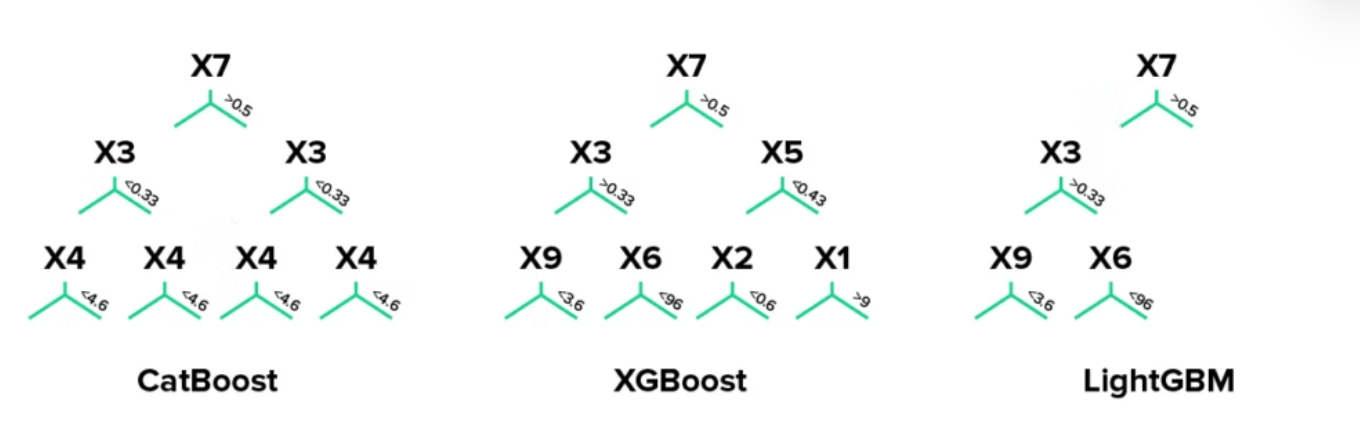

### Q7 ) Stacking  앙상블을 사용해보자 

In [21]:
# 라이브러리 가져오기
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm  import SVC

from sklearn.ensemble import  StackingClassifier 


seed = 0

#데이터로드
loaded_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(loaded_data.data, loaded_data.target, random_state=seed)
kfold = model_selection.KFold(n_splits = 5)
scores = {}

# 1. 로지스틱 회귀
lr_clf = LogisticRegression(solver='lbfgs', max_iter=10000)
lr_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(lr_clf, X_test, y_test, cv = kfold)
scores[('1.Logistic_regression', 'train_score')] = results.mean()
scores[('1.Logistic_regression', 'test_score')] = lr_clf.score(X_test, y_test)

# 2. 결정 나무
dtc_clf = DecisionTreeClassifier(random_state=seed)
dtc_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(dtc_clf, X_test, y_test, cv = kfold)
scores[('2.decision_tree', 'train_score')] = results.mean()
scores[('2.decision_tree', 'test_score')] = dtc_clf.score(X_test, y_test)

# 3.지원 벡터 머신(SVM)
svm_clf = SVC(probability=True, random_state=seed)
svm_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(svm_clf, X_test, y_test, cv = kfold)
scores[('3.SVM', 'train_score')] = results.mean()
scores[('3.SVM', 'test_score')] = svm_clf.score(X_test, y_test)

# 4. 버깅 앙상블
estimators=[('lr', lr_clf), ('dtc', dtc_clf), ('svc', svm_clf)]
stk_clf=StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stk_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(stk_clf, X_test, y_test, cv = kfold)
scores[('4.Stacking', 'train_score')] = results.mean()
scores[('4.Stacking', 'test_score')] = stk_clf.score(X_test, y_test)

# 모델 평가
pd.Series(scores).unstack()

,test_score,train_score
1.Logistic_regression,0.951049,0.936946
2.decision_tree,0.881119,0.916010
3.SVM,0.937063,0.916749
4.Stacking,0.958042,0.958128
